<a href="https://colab.research.google.com/github/ShaldonS/Machine-Learning-Course/blob/main/LastMod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек

In [2]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных

# Загрузка данных

In [3]:
#data_raw = pd.read_csv('/kaggle/input/airplane-crashes-since-1908/Airplane_Crashes_and_Fatalities_Since_1908.csv')
data_raw = pd.read_csv("https://raw.githubusercontent.com/ShaldonS/Machine-Learning-Course/main/Airplane_Crashes.csv")
#from google.colab import files
#uploaded = files.upload()


In [4]:
#import io
#data_raw = pd.read_csv(io.BytesIO(uploaded['Airplane_Crashes.csv']))

In [5]:
data_raw.shape

(5268, 13)

In [6]:
data_raw

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


#О датасете

**Описание:** Полная история авиакатастроф по всему миру, с 1908 года по 2009 год.

**Колонки:**
- `Date` - дата крушения
- `Time` - время
- `Location` - место крушения
- `Operator` - оператор
- `Flight` - номер рейса
- `Route` - маршрут	(до аварии)
- `Type`- 	тип самолета
- `Registration`- номер регистрации	
- `cn/In` - строительный или серийный номер 
- `Aboard` - число людей на борту	
- `Fatalities` - смертельные случаи
- `Ground` - 	погибло во время приземления
- `Summary` - общее описание

In [8]:
data_raw.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [9]:
percent_missing = data_raw.isnull().sum() * 100 / len(data_raw)
missing_value_df = pd.DataFrame({'column_name': data_raw.columns,
                                 'percent_missing': percent_missing})
missing_value_df.mean() 

<ipython-input-9-3dcc65202563>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  missing_value_df.mean()


percent_missing    14.891069
dtype: float64

Связь между числовыми признаками:

In [10]:
corr_matr = data_raw.corr()
corr_matr

,Aboard,Fatalities,Ground
Aboard,1.000000,0.757172,0.023241
Fatalities,0.757172,1.000000,0.035170
Ground,0.023241,0.035170,1.000000


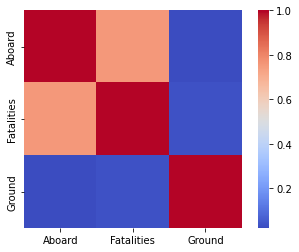

In [11]:
sns.heatmap(corr_matr, square=True, cmap='coolwarm')

# Выбросы

In [12]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Aboard,5246.0,27.554518,43.076711,0.0,5.0,13.0,30.0,644.0
Fatalities,5256.0,20.068303,33.199952,0.0,3.0,9.0,23.0,583.0
Ground,5246.0,1.608845,53.987827,0.0,0.0,0.0,0.0,2750.0


In [13]:
data_raw.quantile(0.99)

Aboard        215.65
Fatalities    158.45
Ground         13.55
Name: 0.99, dtype: float64

In [14]:
data = data_raw.copy()

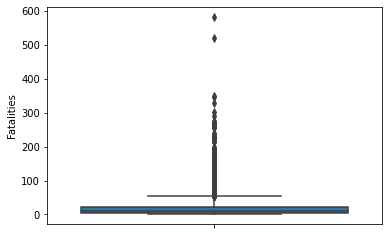

In [15]:
sns.boxplot(y = "Fatalities", data=data_raw)

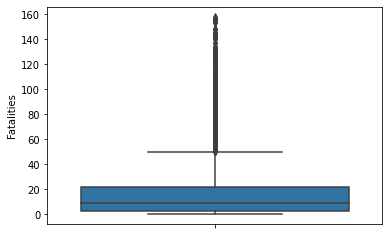

In [16]:
rows_to_drop = data[(data['Fatalities'] > data['Fatalities'].quantile(0.99))].index
data = data.drop(rows_to_drop)

sns.boxplot(y = "Fatalities", data=data)

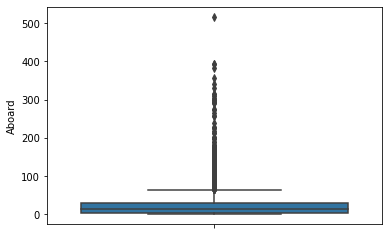

In [17]:
sns.boxplot(y = "Aboard", data=data)

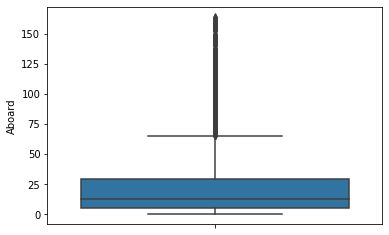

In [18]:
rows_to_drop = data[(data['Aboard'] > data['Aboard'].quantile(0.99))].index
data = data.drop(rows_to_drop)

sns.boxplot(y = "Aboard", data=data)

# Графики

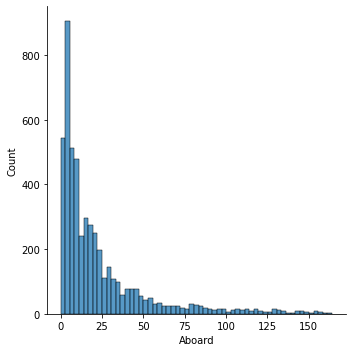

In [19]:
sns_plot = sns.displot(data["Aboard"])

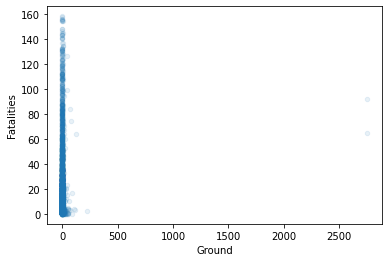

In [20]:
data.plot(x="Ground", y="Fatalities", kind="scatter", alpha = 0.1)
plt.show() 

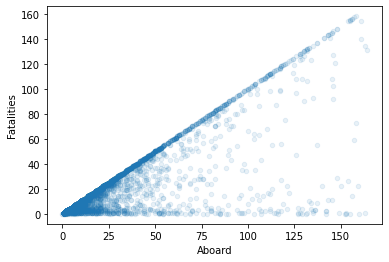

In [21]:
data.plot(x="Aboard", y="Fatalities", kind="scatter", alpha = 0.1)
plt.show() 

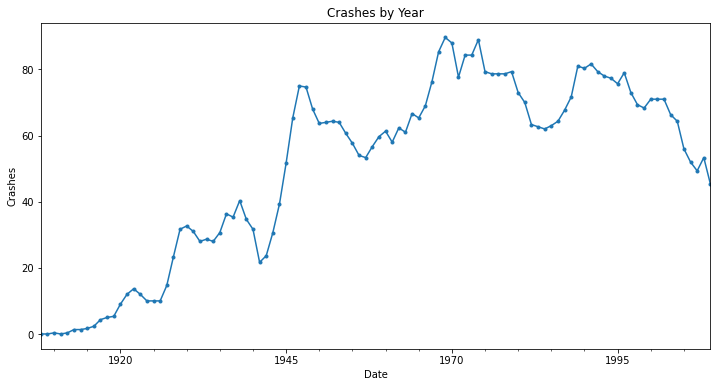

In [22]:
data['Date']=pd.DatetimeIndex(data['Date'])
df_date_index=data.set_index('Date')

crashed_by_year=df_date_index.resample('1y').size().rolling(3).mean().fillna(0)
crashed_by_year.plot(figsize=[12, 6], title='Crashes by Year', ylabel='Crashes', marker=".")

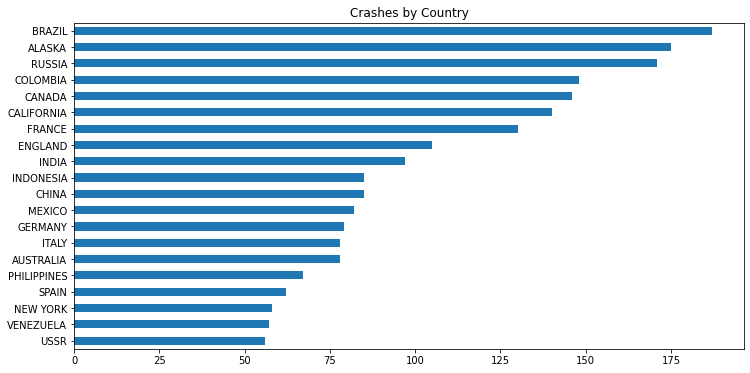

In [23]:
data['Location Country']  = data['Location'].str.split(',').str[-1].str.strip().str.upper()

data['Location Country'].value_counts().head(20).sort_values().plot( kind='barh',figsize=[12, 6], title='Crashes by Country' )

data = data.drop(columns='Location Country')

# Работа с датасетом

In [24]:
data.isnull().sum()

Date               0
Time            2211
Location          20
Operator          18
Flight #        4180
Route           1705
Type              27
Registration     334
cn/In           1226
Aboard            22
Fatalities        12
Ground            22
Summary          389
dtype: int64

Видим, что колонка Flight содержит много пустых значений - избавимся от нее.

In [25]:
data = data.drop(columns='Flight #')

Избавимся также от колонок, не несущих большого смысла

In [26]:
data = data.drop(columns='Summary')
data = data.drop(columns='cn/In')

In [27]:
data['Ground'].value_counts()

0.0       4931
1.0         52
2.0         25
3.0         21
4.0         13
8.0         10
5.0          9
7.0          7
6.0          6
11.0         5
22.0         5
13.0         4
24.0         3
10.0         3
44.0         3
20.0         3
14.0         2
2750.0       2
30.0         2
19.0         2
47.0         2
52.0         2
70.0         2
15.0         1
54.0         1
18.0         1
45.0         1
16.0         1
49.0         1
50.0         1
23.0         1
225.0        1
125.0        1
75.0         1
35.0         1
32.0         1
9.0          1
40.0         1
36.0         1
12.0         1
113.0        1
107.0        1
33.0         1
87.0         1
31.0         1
63.0         1
17.0         1
37.0         1
58.0         1
85.0         1
Name: Ground, dtype: int64

In [28]:
data.loc[(data.Ground > 0), 'Ground'] = 1
data['Ground'].value_counts()

0.0    4931
1.0     210
Name: Ground, dtype: int64

Будем считать, что если число погибших на земле больше 0 (то есть, погибшие есть), то значение равно 1. Если погибших нет, значение равно 0.

Отделим категориальные и численные признаки

In [29]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Time', 'Location', 'Operator', 'Route', 'Type', 'Registration']
['Date', 'Aboard', 'Fatalities', 'Ground']


In [30]:
data.median(axis = 0)

<ipython-input-30-6aeb7e95d864>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.median(axis = 0)
<ipython-input-30-6aeb7e95d864>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median(axis = 0)


Aboard        13.0
Fatalities     9.0
Ground         0.0
dtype: float64

Заполним пропущенные значения числовых признаков медианными значениями

In [31]:
data = data.fillna(data.median(axis = 0), axis = 0)

<ipython-input-31-63d340763a3f>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.median(axis = 0), axis = 0)
<ipython-input-31-63d340763a3f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median(axis = 0), axis = 0)


In [32]:
data[numerical_columns].count(axis = 0)

Date          5163
Aboard        5163
Fatalities    5163
Ground        5163
dtype: int64

In [33]:
data[categorical_columns].count(axis = 0)

Time            2952
Location        5143
Operator        5145
Route           3458
Type            5136
Registration    4829
dtype: int64

In [34]:
data.describe(include = [object])

,Time,Location,Operator,Route,Type,Registration
count,2952,5143,5145,3458,5136,4829
unique,989,4237,2454,3155,2389,4801
top,15:00,"Moscow, Russia",Military - U.S. Air Force,Training,Douglas DC-3,49
freq,32,15,175,81,334,3


In [35]:
data.isnull().sum()

Date               0
Time            2211
Location          20
Operator          18
Route           1705
Type              27
Registration     334
Aboard             0
Fatalities         0
Ground             0
dtype: int64

Заменим пропущенные значения категориальных признаков на значения моды

In [36]:
data["Location"] = data["Location"].fillna(data["Location"].mode()[0], axis=0)
data["Time"] = data["Time"].fillna(data["Time"].mode()[0], axis=0)
data["Operator"] = data["Operator"].fillna(data["Operator"].mode()[0], axis=0)
data["Route"] = data["Route"].fillna(data["Route"].mode()[0], axis=0)
data["Type"] = data["Type"].fillna(data["Type"].mode()[0], axis=0) 

In [37]:
data[categorical_columns].count(axis = 0)

Time            5163
Location        5163
Operator        5163
Route           5163
Type            5163
Registration    4829
dtype: int64

In [38]:
data[numerical_columns].count(axis = 0)

Date          5163
Aboard        5163
Fatalities    5163
Ground        5163
dtype: int64

# Векторизация

In [39]:
text_columns = categorical_columns.copy()
print(text_columns)

['Time', 'Location', 'Operator', 'Route', 'Type', 'Registration']


Сделаем колонки Time и Date числовыми

In [40]:
for i in range(len(data['Time'])) :
  if data['Time'].iloc[i][0] == 'c':
    data['Time'].iloc[i] = data['Time'].iloc[i][2:]
  try:
    data['Time'].iloc[i] = float(data['Time'].iloc[i].replace(":",""))
  except:
    data['Time'].iloc[i] = float(data['Time'].iloc[i].replace("'",""))

data['Time'] = data['Time'].astype('float64')
data['Date'] = data['Date'].astype('int64')

data['Time'].describe()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-40-60d4d7fefb37>:10: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data['Date'] = data['Date'].astype('int64')


count     5163.000000
mean      1391.353360
std        486.235892
min          0.000000
25%       1212.000000
50%       1500.000000
75%       1500.000000
max      11420.000000
Name: Time, dtype: float64

Избавимся от выбросов

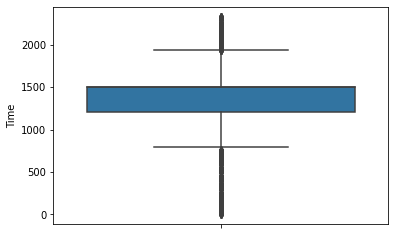

In [41]:
rows_to_drop = data[(data['Time'] > data['Time'].quantile(0.99))].index
data = data.drop(rows_to_drop)

sns.boxplot(y = "Time", data=data)

Приведем текстовые признаки к числовым

In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data_new = labelencoder.fit_transform(data['Location'].values)
data_new[:10]
data['Location'] = data_new.copy()

data_new = labelencoder.fit_transform(data['Operator'].values)
data_new[:10]
data['Operator'] = data_new.copy()

data_new = labelencoder.fit_transform(data['Route'].values)
data_new[:10]
data['Route'] = data_new.copy()

data_new = labelencoder.fit_transform(data['Type'].values)
data_new[:10]
data['Type'] = data_new.copy()

data_new = labelencoder.fit_transform(data['Registration'].values)
data_new[:10]
data['Registration'] = data_new.copy()

data

,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground
0,-1934150400000000000,1718.0,825,1544,806,2262,4759,2.0,1.0,0.0
1,-1813708800000000000,630.0,115,1555,2865,1013,4759,5.0,5.0,0.0
2,-1780012800000000000,1500.0,4073,1795,2913,975,4759,1.0,1.0,0.0
3,-1777075200000000000,1830.0,3295,1444,2913,2276,4759,20.0,14.0,0.0
4,-1773792000000000000,1030.0,2235,1444,2913,2278,4759,30.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5262,1241308800000000000,1200.0,2096,1570,2218,1841,1362,18.0,18.0,0.0
5263,1242777600000000000,630.0,2375,1455,1252,1679,604,112.0,98.0,1.0
5264,1243296000000000000,1500.0,2214,1968,1032,138,581,4.0,4.0,0.0
5266,1244332800000000000,830.0,2584,2086,1608,667,758,1.0,1.0,0.0


# Нормировка

Стандартизация

In [43]:
columns_for_stand = ["Date", "Time", "Aboard", "Fatalities"]
data[columns_for_stand] = (data[columns_for_stand] - data[columns_for_stand].mean(axis=0))/data[columns_for_stand].std(axis=0)
data.describe()

,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground
count,5.117000e+03,5.117000e+03,5117.000000,5117.000000,5117.000000,5117.000000,5117.000000,5.117000e+03,5.117000e+03,5117.000000
mean,-8.886991e-17,-2.985474e-16,2060.532343,1194.875904,2042.473910,1209.107485,2530.454954,-3.888059e-17,5.554370e-18,0.041040
std,1.000000e+00,1.000000e+00,1226.354817,698.550032,968.397557,640.416724,1454.488338,1.000000e+00,1.000000e+00,0.198401
min,-2.799710e+00,-3.008161e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-8.090047e-01,-7.383641e-01,0.000000
25%,-7.822731e-01,-3.724646e-01,989.000000,596.000000,1215.000000,766.000000,1265.000000,-6.341060e-01,-6.133103e-01,0.000000
50%,5.761304e-02,2.592313e-01,2038.000000,1254.000000,2433.000000,1130.000000,2542.000000,-3.542681e-01,-3.632026e-01,0.000000
75%,8.351949e-01,2.592313e-01,3128.000000,1732.000000,2913.000000,1695.000000,3817.000000,1.704280e-01,1.786972e-01,0.000000
max,1.694628e+00,2.067188e+00,4198.000000,2435.000000,3122.000000,2370.000000,4759.000000,4.927672e+00,5.847803e+00,1.000000


Нормализация. Нормировка к отрезку от 0 до 1 (label encoder) - кодировка текста



In [44]:
OldMax = data['Location'].max()
OldMin = data['Location'].min()
NewMax = 1
NewMin = 0
OldRange = (OldMax - OldMin)
NewRange = (NewMax - NewMin)
for i in range(len( data['Location']) ):
  OldValue = data['Location'].iloc[i]
  NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
  data['Location'].iloc[i] = NewValue

data['Location'].describe()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


count    5117.000000
mean        0.490837
std         0.292128
min         0.000000
25%         0.235588
50%         0.485469
75%         0.745117
max         1.000000
Name: Location, dtype: float64

In [45]:
OldMax = data['Operator'].max()
OldMin = data['Operator'].min()
NewMax = 1
NewMin = 0
OldRange = (OldMax - OldMin)
NewRange = (NewMax - NewMin)
for i in range(len( data['Operator']) ):
  OldValue = data['Operator'].iloc[i]
  NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
  data['Operator'].iloc[i] = NewValue

data['Operator'].describe()

count    5117.000000
mean        0.490709
std         0.286879
min         0.000000
25%         0.244764
50%         0.514990
75%         0.711294
max         1.000000
Name: Operator, dtype: float64

In [46]:
OldMax = data['Route'].max()
OldMin = data['Route'].min()
NewMax = 1
NewMin = 0
OldRange = (OldMax - OldMin)
NewRange = (NewMax - NewMin)
for i in range(len( data['Route']) ):
  OldValue = data['Route'].iloc[i]
  NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
  data['Route'].iloc[i] = NewValue

data['Route'].describe()

count    5117.000000
mean        0.654220
std         0.310185
min         0.000000
25%         0.389174
50%         0.779308
75%         0.933056
max         1.000000
Name: Route, dtype: float64

In [47]:
OldMax = data['Type'].max()
OldMin = data['Type'].min()
NewMax = 1
NewMin = 0
OldRange = (OldMax - OldMin)
NewRange = (NewMax - NewMin)
for i in range(len( data['Type']) ):
  OldValue = data['Type'].iloc[i]
  NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
  data['Type'].iloc[i] = NewValue

data['Type'].describe()

count    5117.000000
mean        0.510172
std         0.270218
min         0.000000
25%         0.323207
50%         0.476793
75%         0.715190
max         1.000000
Name: Type, dtype: float64

In [48]:
OldMax = data['Registration'].max()
OldMin = data['Registration'].min()
NewMax = 1
NewMin = 0
OldRange = (OldMax - OldMin)
NewRange = (NewMax - NewMin)
for i in range(len( data['Registration']) ):
  OldValue = data['Registration'].iloc[i]
  NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
  data['Registration'].iloc[i] = NewValue

data['Registration'].describe()

count    5117.000000
mean        0.531720
std         0.305629
min         0.000000
25%         0.265812
50%         0.534146
75%         0.802059
max         1.000000
Name: Registration, dtype: float64

In [49]:
data

,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground
0,-2.799710,0.734092,0.196522,0.634086,0.258168,0.954430,1.000000,-0.739045,-0.696679,0.0
1,-2.629412,-1.635856,0.027394,0.638604,0.917681,0.427426,1.000000,-0.634106,-0.529941,0.0
2,-2.581767,0.259231,0.970224,0.737166,0.933056,0.411392,1.000000,-0.774025,-0.696679,0.0
3,-2.577614,0.978058,0.784898,0.593018,0.933056,0.960338,1.000000,-0.109410,-0.154780,0.0
4,-2.572971,-0.764552,0.532396,0.593018,0.933056,0.961181,1.000000,0.240387,0.512174,0.0
...,...,...,...,...,...,...,...,...,...,...
5262,1.690230,-0.394247,0.499285,0.644764,0.710442,0.776793,0.286195,-0.179369,0.011959,0.0
5263,1.692306,-1.635856,0.565746,0.597536,0.401025,0.708439,0.126917,3.108726,3.346727,1.0
5264,1.693039,0.259231,0.527394,0.808214,0.330557,0.058228,0.122084,-0.669086,-0.571626,0.0
5266,1.694505,-1.200204,0.615531,0.856674,0.515054,0.281435,0.159277,-0.774025,-0.696679,0.0


In [50]:
data.Ground.value_counts()

0.0    4907
1.0     210
Name: Ground, dtype: int64

In [51]:
size = int(data.Ground.size/3)

for i in range(size):
  try:
    if data.Ground.loc[i] == 0:
      data.Ground.at[i] = 1
  except:
    size+=1

data.Ground.value_counts()

0.0    3276
1.0    1841
Name: Ground, dtype: int64

# Разделение на тестовую и обучающую выборки

In [52]:
from sklearn.model_selection import train_test_split

X = data.drop("Ground", axis=1)
y = data["Ground"]
X.shape, y.shape

X = X.to_numpy()


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

3581 1536 (3581,) (1536,)


In [54]:
from prettytable import PrettyTable

methods = PrettyTable(["", "KNN", "SVC", "Random Forest", "Extremely Randomized Trees", "AdaBoost", "GBT"])

test_error_list = ["Test error"]
train_error_list = ["Train error"]

Метод К-ближайших соседей

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [56]:
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test  != y_test_predict)
err_test

0.057291666666666664

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


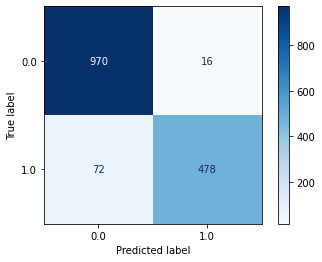

In [57]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

In [58]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.05584724794198659 15


In [59]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

test_error_list.append(err_test)
train_error_list.append(err_train)

0.051940798659592294 0.056640625


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


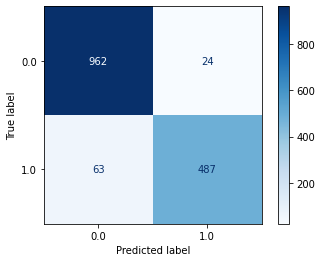

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

SVC

In [61]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

test_error_list.append(err_test)
train_error_list.append(err_train)

0.03853672158614912 0.036458333333333336


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


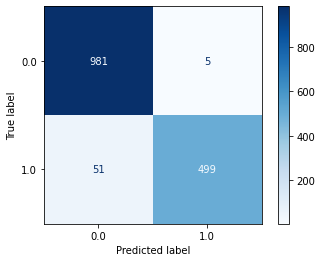

In [62]:
plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues)

Random Forest

In [63]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

test_error_list.append(err_test)
train_error_list.append(err_train)

0.0 0.027994791666666668


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


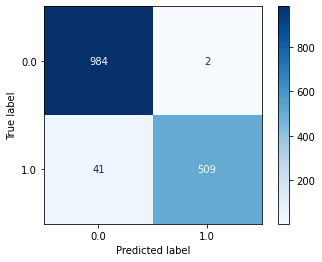

In [64]:
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)

Extremely Randomized Trees

In [65]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

test_error_list.append(err_test)
train_error_list.append(err_train)

0.0 0.034505208333333336


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


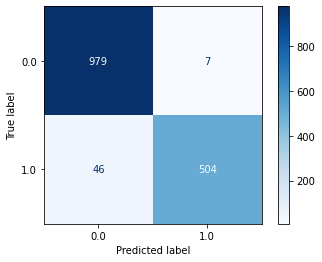

In [66]:
plot_confusion_matrix(ert, X_test, y_test, cmap=plt.cm.Blues)

AdaBoost

In [67]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

test_error_list.append(err_test)
train_error_list.append(err_train)

0.008377548170901982 0.042317708333333336


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


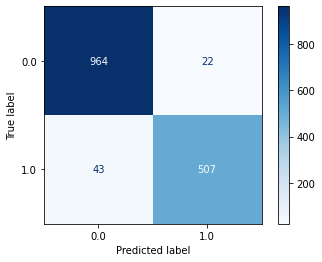

In [68]:
plot_confusion_matrix(ada, X_test, y_test, cmap=plt.cm.Blues)

GBT

In [69]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

test_error_list.append(err_test)
train_error_list.append(err_train)

0.0 0.03515625


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


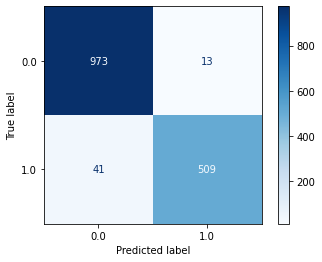

In [70]:
plot_confusion_matrix(gbt, X_test, y_test, cmap=plt.cm.Blues)

# Вывод

In [71]:
methods.add_row(test_error_list)
methods.add_row(train_error_list)
print(methods)

+-------------+----------------------+----------------------+----------------------+----------------------------+----------------------+------------+
|             |         KNN          |         SVC          |    Random Forest     | Extremely Randomized Trees |       AdaBoost       |    GBT     |
+-------------+----------------------+----------------------+----------------------+----------------------------+----------------------+------------+
|  Test error |     0.056640625      | 0.036458333333333336 | 0.027994791666666668 |    0.034505208333333336    | 0.042317708333333336 | 0.03515625 |
| Train error | 0.051940798659592294 | 0.03853672158614912  |         0.0          |            0.0             | 0.008377548170901982 |    0.0     |
+-------------+----------------------+----------------------+----------------------+----------------------------+----------------------+------------+


Наименьшую ошибку на тестовой выборке показали методы Random Forest. Наибольшую - KNN.

# Полносвязная неглубокая нейронная сеть

In [78]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
N_test, _ = X_test.shape

mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs', 
                          activation = 'logistic',
                          random_state = 42, max_iter=400)

In [79]:
%%time
mlp_model.fit(X_train, y_train)

CPU times: user 14.1 s, sys: 10.3 s, total: 24.4 s
Wall time: 12.8 s


MLPClassifier(activation='logistic', max_iter=400, random_state=42,
              solver='lbfgs')

**Качество классификатора:**

In [80]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [81]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0036302708740575257 0.064453125


In [82]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

0.9963697291259425 0.935546875


In [83]:
print(1 - mlp_model.score(X_test, y_test))

0.064453125


___

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.9963697291259425

In [85]:
accuracy_score(y_test, y_test_pred)

0.935546875

**Подбор оптимального значения параметра alpha:**

In [88]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

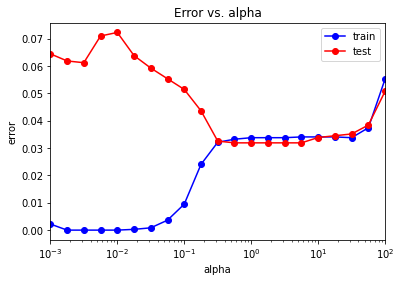

In [89]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

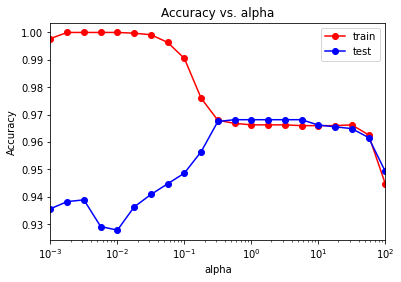

In [90]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

**Минимальное значение ошибки:**

In [91]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.031901041666666664


**Оптимальное значение параметра alpha:**

In [92]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.56234133 1.         1.77827941 3.16227766 5.62341325]


In [93]:
alpha_opt = alpha_opt[0]
alpha_opt

0.5623413251903491

**Повторное обучение с оптимальным значением параметра alpha:**

In [96]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42, max_iter=500)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0332309410779112 0.031901041666666664


**Матрица рассоглосования:**

In [97]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[982  45]
 [  4 505]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


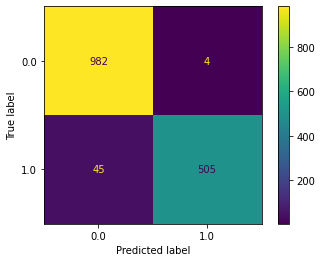

In [103]:
plot_confusion_matrix(mlp_model, X_test, y_test) 

**Другие характеристики:**

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       986
         1.0       0.99      0.92      0.95       550

    accuracy                           0.97      1536
   macro avg       0.97      0.96      0.96      1536
weighted avg       0.97      0.97      0.97      1536

